<a href="https://colab.research.google.com/github/raulmaulidhino-dev/R_EDA_ExploratoryDataAnalysis/blob/main/Student_Scores_Prediction_Supervised_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

# **Preparation**

In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('student_scores.csv')

# **Exploratory Data Analysis (EDA)**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.value_counts()

,,count
Hours,Scores,
1.1,17,1
5.1,47,1
8.9,95,1
8.5,75,1
8.3,81,1
7.8,86,1
7.7,85,1
7.4,69,1
6.9,76,1


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

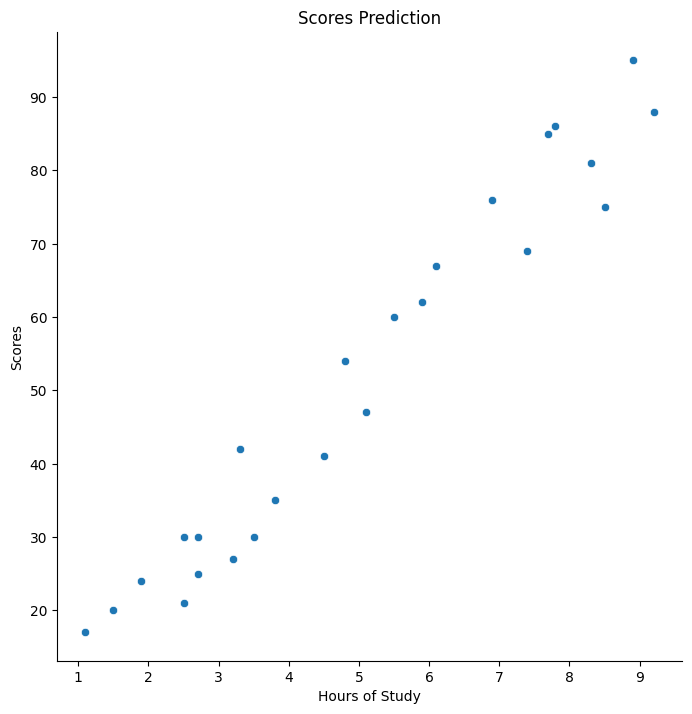

In [6]:
# Plot the data to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=["Hours"],y_vars=["Scores"],size=7,kind='scatter')
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.title("Scores Prediction")
plt.show()

# **Feature Engineering**



*   Check Missing Value Handling


In [7]:
data.isna().sum()

,0
Hours,0
Scores,0


In [8]:
data.value_counts()

,,count
Hours,Scores,
1.1,17,1
5.1,47,1
8.9,95,1
8.5,75,1
8.3,81,1
7.8,86,1
7.7,85,1
7.4,69,1
6.9,76,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


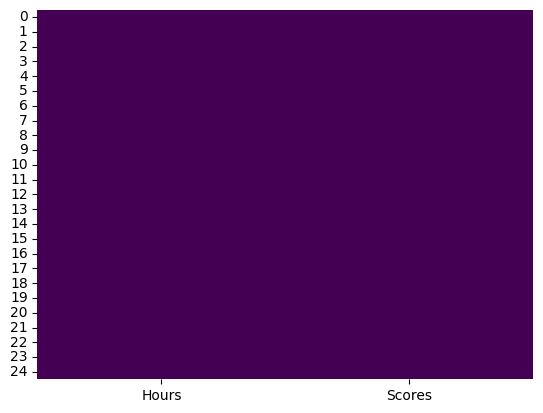

In [10]:

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

*   Check Duplicated Data

In [11]:
df = data.copy()

In [12]:
# Check Any Duplicates
print("Before duplicates checking : ")
print(df.shape)

Before duplicates checking : 
(25, 2)


In [13]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [14]:
df = df.drop_duplicates()

In [15]:
duplicate_rows_before = df[df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows_before.shape)

Number of duplicate rows :  (0, 2)


In [16]:
print("After duplicates checking : ")
print(df.shape)

After duplicates checking : 
(25, 2)


* Outlier Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

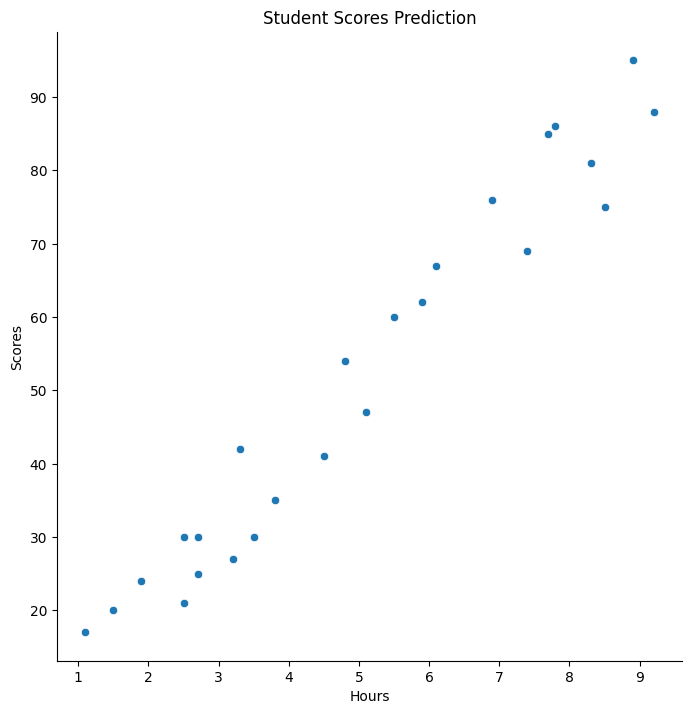

In [17]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'], size=7, kind="scatter")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Student Scores Prediction')
plt.show()

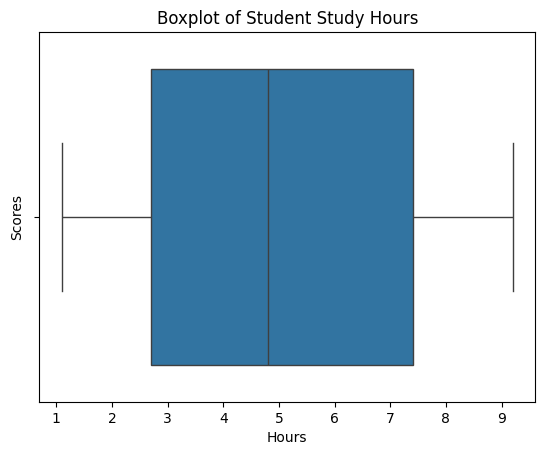

In [18]:
sns.boxplot(x="Hours", data=df)

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Boxplot of Student Study Hours")

plt.show()

# 2.  Machine Learning Modelling



* Splitting the Data

In [19]:
X = data["Hours"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [20]:
y = data["Scores"]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


* Using the Data to Model and Train

In [21]:
# import the dependencies needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [23]:
X_train = np.array(X_train)[:, np.newaxis]
X_test = np.array(X_test)[:, np.newaxis]

In [24]:
X_train

array([[7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [25]:
y_train

,Scores
24,86
7,60
10,85
14,17
19,69
6,88


## **a. Model 1 : LinearRegression**

In [26]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr_model.predict(X_test)
print(y_pred)
print(y_test)

[84.57812689 31.03589124 31.03589124 71.65413897 62.42271903 32.88217523
 38.42102719 55.03758308 43.03673716 21.8044713  37.4978852  49.49873112
 90.11697885 86.42441088 40.26731118 32.88217523 25.49703927 52.2681571
 64.26900302]
8     81
16    30
0     21
23    76
11    62
9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
Name: Scores, dtype: int64


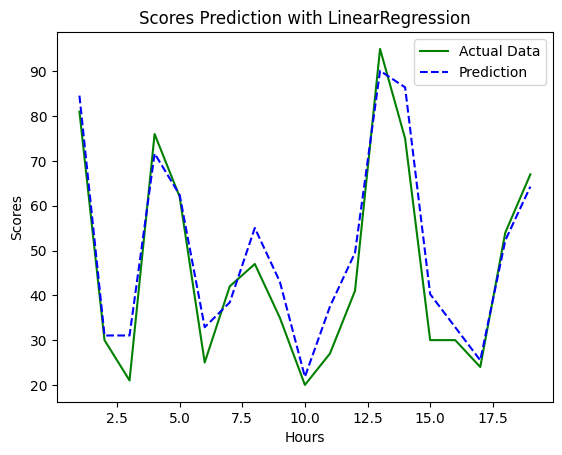

In [28]:
c = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(c,y_test, color='g', linestyle='-', label='Actual Data')
plt.plot(c,y_pred, color='b', linestyle='--', label='Prediction')
plt.title('Scores Prediction with LinearRegression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

## Model Evaluation

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
rsq = r2_score(y_test, y_pred)
print("R-squared Linear Regression : ", rsq)

R-squared Linear Regression :  0.9165928355532872


In [31]:
# Check the Intercept and Coefficient
print('Intercept of the Linear Regression model:', lr_model.intercept_)
print('Coefficient of the Linear Regression model:', lr_model.coef_)

Intercept of the Linear Regression model: 7.957341389728107
Coefficient of the Linear Regression model: [9.23141994]


Linear Equation Formula : (Approx.)
# **y = 7.96x + 9.23**

## **b. Model 2 : DecisionTreeRegressor**

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
# DecisionTreeRegressor is predicting..
y_pred_dt = dt_model.predict(X_test)

In [35]:
y_pred_dt

array([86., 17., 17., 69., 60., 17., 17., 60., 60., 17., 17., 60., 88.,
       86., 60., 17., 17., 60., 60.])

In [36]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42
1,47
22,35
5,20


In [37]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1]])

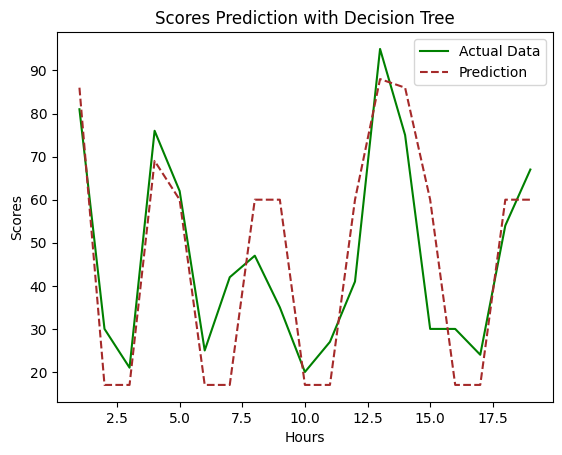

In [38]:
# Plotting the Actual Data and the Prediction
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='brown',linestyle='--',label='Prediction')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores Prediction with Decision Tree")
plt.legend()
plt.show()

## Model Evaluation

In [39]:
rsq_dt = r2_score(y_test, y_pred_dt)
print("R-squared DecisionTreeRegressor : ", rsq_dt)

R-squared DecisionTreeRegressor :  0.6277987009442716


## **c. Model 3 : RandomForestRegressor**

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
# Predicting Student Scores with RandomForestRegressor
y_pred_rf = rf.predict(X_test)

In [43]:
y_pred_rf

array([85.47, 30.33, 30.33, 72.81, 63.51, 30.33, 30.33, 63.51, 50.54,
       30.33, 30.33, 63.51, 86.67, 85.89, 50.54, 30.33, 30.33, 63.51,
       63.51])

In [44]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42
1,47
22,35
5,20


In [45]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1]])

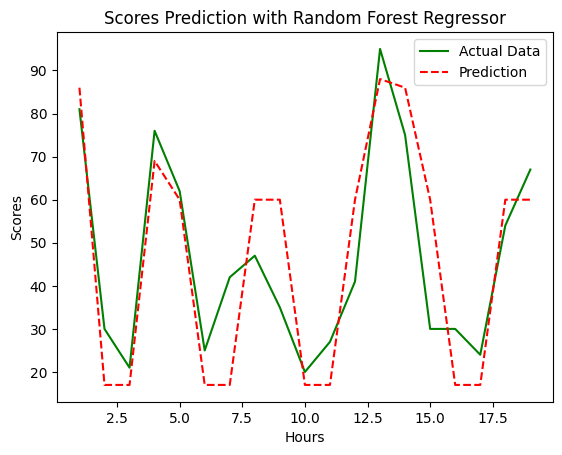

In [46]:
# Plotting the Actual Data and the Prediction
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='r',linestyle='--',label='Prediction')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores Prediction with Random Forest Regressor")
plt.legend()
plt.show()

## Model Evaluation

In [47]:
rsq_rf = r2_score(y_test, y_pred_rf)
print("R-squared RandomForestRegressor : ", rsq_rf)

R-squared RandomForestRegressor :  0.7743942737841821


# **Conclusion**
Between the three models (LinearRegression, DecisionTreeRegressor, and RandomForestRegressor), model with the best performance is **LinearRegression** 🥳. Here are the R-squared score results :

In [48]:
print(LinearRegression, " : ", rsq)
print(DecisionTreeRegressor, " : ", rsq_dt)
print(RandomForestRegressor, " : ", rsq_rf)

<class 'sklearn.linear_model._base.LinearRegression'>  :  0.9165928355532872
<class 'sklearn.tree._classes.DecisionTreeRegressor'>  :  0.6277987009442716
<class 'sklearn.ensemble._forest.RandomForestRegressor'>  :  0.7743942737841821
